In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
import h5py
filename = 'data/SNOLAB_sims.h5'
#remove vars
f = h5py.File(filename,'r')

path='{}/{}/'.format('SNOLAB','10x')

En = np.asarray(f[path+'En'])
print(np.shape(En))


path='{}/{}/'.format('SNOLAB','1x')

Enlow = np.asarray(f[path+'En'])
print(np.shape(Enlow))

path='{}/{}/'.format('SNOLAB','100x')

Enmax = np.asarray(f[path+'En'])
print(np.shape(Enmax))

path='{}/{}/'.format('SNOLAB','1000x')

Encentury = np.asarray(f[path+'En'])
print(np.shape(Encentury))

path='{}/{}/'.format('SNOLAB','10000x')

En10k = np.asarray(f[path+'En'])
print(np.shape(En10k))

path='{}/{}/'.format('SNOLAB','elastic')

Enel = np.asarray(f[path+'En'])
print(np.shape(Enel))

path='{}/{}/'.format('SNOLAB','elastic1x')

Enel1x = np.asarray(f[path+'En'])
print(np.shape(Enel))

f.close

(9480,)
(948,)
(94800,)
(948000,)
(9480000,)
(1020000,)
(1020000,)


<bound method File.close of <HDF5 file "SNOLAB_sims.h5" (mode r)>>

In [3]:
#make histos (counts per day)


ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(En+0.764,bins=ebins)

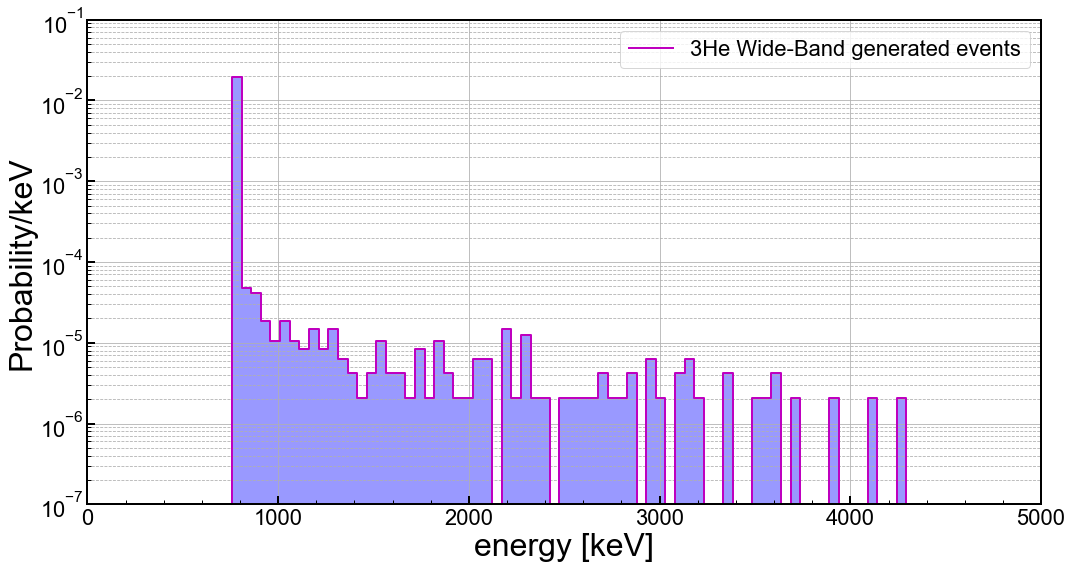

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)


ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [5]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(Enlow+0.764,bins=ebins)

nel,nxel = np.histogram(Enel1x,bins=ebins)

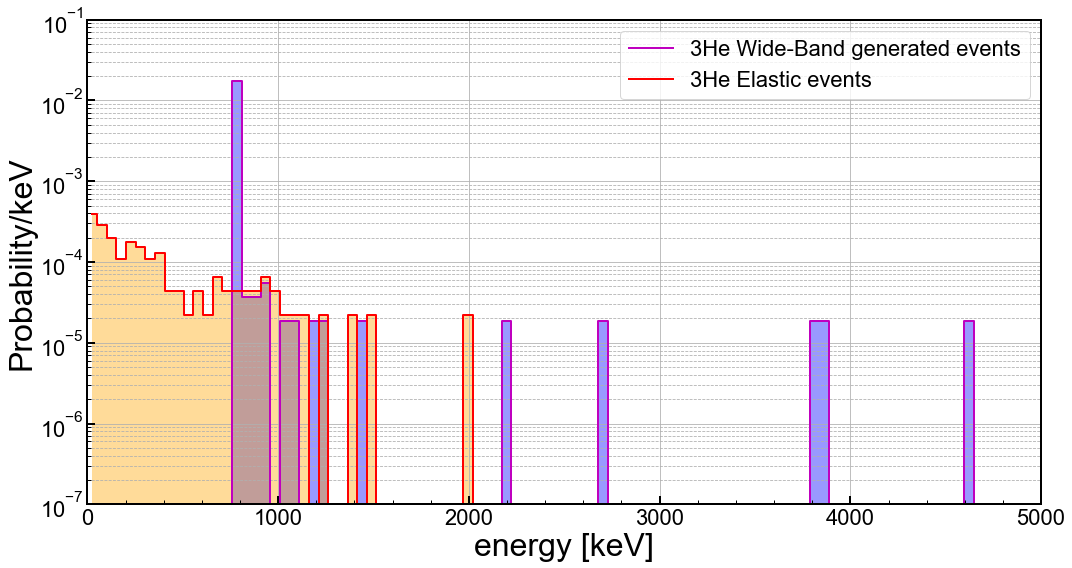

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]*(948/(948+120))
thistel = (nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)


ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [7]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(Enmax+0.764,bins=ebins)

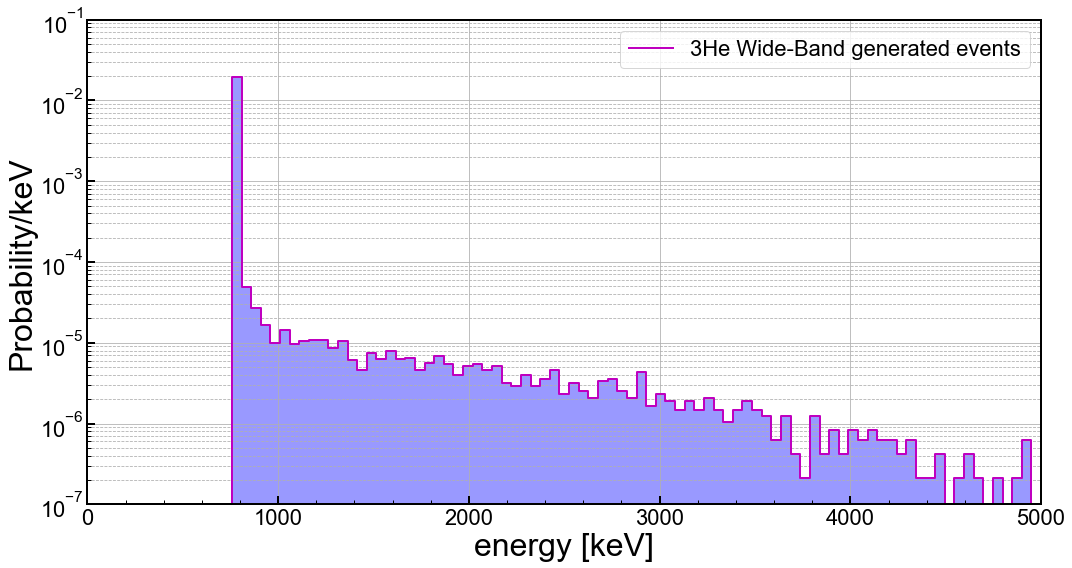

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)


ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [9]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(Encentury+0.764,bins=ebins)

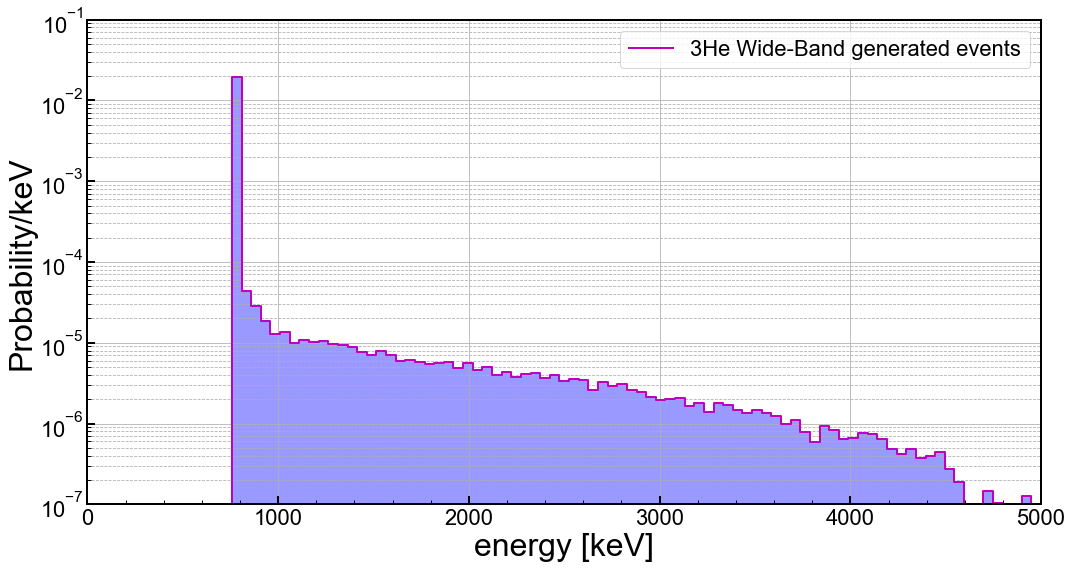

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)


ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [11]:
ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(En10k+0.764,bins=ebins)


nel,nxel = np.histogram(Enel,bins=ebins)

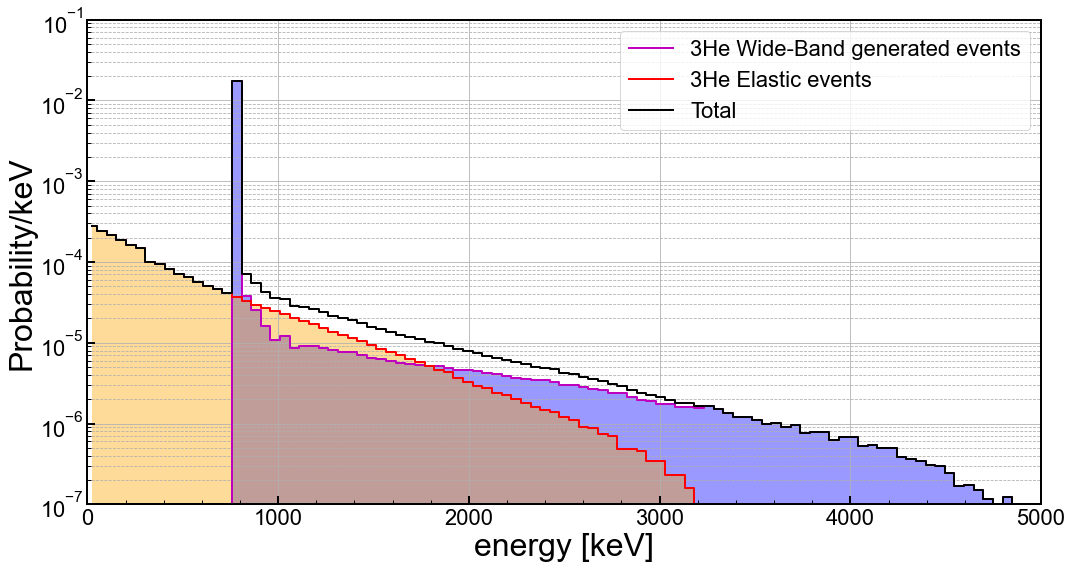

In [12]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = (n/np.sum(n)/np.diff(xcq*1000)[0])*(948/(948+120))
thistel = (nel/np.sum(nel)/np.diff(xcq*1000)[0])*(120/(948+120))


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)
ax1.step(xcq*1000,thistel, where='mid',color='r', linestyle='-', \
            label='3He Elastic events', linewidth=2)
ax1.step(xcq*1000,thistel+thist, where='mid',color='k', linestyle='-', \
            label='Total', linewidth=2)



ymin = 1e-7
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thistel,step='mid',facecolor='orange',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('Probability/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [13]:
f.close()

Add Resolutions and Stuff
-------------------------

In [15]:
#En10k -- vector for 10,000 yrs of (n,p)
#Enel -- vector for 10,000 yrs of elastics
#Enlow -- vector for 1 yr of (n,p)
#Enel1x -- vector for 1 yr of elastics

In [16]:
#get some cross section data
import ENDF6
f = open('data/jendl5_3He.endf6')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # Elastic
x, y = ENDF6.read_table(sec)

sec_np = ENDF6.find_section(lines, MF=3, MT=103)  # Elastic
xnp, ynp = ENDF6.read_table(sec_np)

In [17]:
#densities to convert to macroscopic xn
rholhe3 = 0.0792 #g/cm^3
masshe3 = 3.016 #molar mass
nhe3 = (rholhe3/masshe3)*co.N_A

In [18]:
ESigElMeV = x/1e6
SigElMeV = y*1e-24*nhe3

ESigMeV = xnp/1e6
SigMeV = ynp*1e-24*nhe3

In [19]:
prange_data = pd.read_csv("data/p-range-helium.txt", skiprows=8, names=['E [MeV]', 'CDSA range [g/cm2]','projected range'], \
                         delim_whitespace=True)
print (prange_data.head(10))

   E [MeV]  CDSA range [g/cm2]  projected range
0   0.0010            0.000005         0.000003
1   0.0015            0.000007         0.000004
2   0.0020            0.000009         0.000006
3   0.0025            0.000010         0.000007
4   0.0030            0.000012         0.000008
5   0.0040            0.000015         0.000011
6   0.0050            0.000017         0.000013
7   0.0060            0.000019         0.000015
8   0.0070            0.000021         0.000017
9   0.0080            0.000023         0.000019


In [20]:
T = np.asarray(prange_data['E [MeV]'])
Tcut = (T<0.85)&(T>0.7)
R = np.asarray(prange_data['CDSA range [g/cm2]'])
Rproj = np.asarray(prange_data['projected range'])

In [25]:
#get functions for the macroscopic (n,p) cross sections and the range as functions of energy. 

import scipy.interpolate as inter

Sigmanp = inter.InterpolatedUnivariateSpline(ESigMeV,SigMeV, k=3)
pRange = inter.InterpolatedUnivariateSpline(T,R/rholhe3, k=3)

In [29]:
print(pRange([.01,0.1,1]))

[0.00033889 0.00151136 0.02708333]


In [30]:
#En10k -- vector for 10,000 yrs of (n,p)
#Enel -- vector for 10,000 yrs of elastics
#Enlow -- vector for 1 yr of (n,p)
#Enel1x -- vector for 1 yr of elastics

Q=0.764
#calculate which events have the penetration range less than the proton range
penRange_np10k = 1/Sigmanp(En10k)
protRange_np10k = pRange(En10k+Q)

In [31]:
print(penRange_np10k[0:10])
print(protRange_np10k[0:10])

[0.8922155  0.00714672 0.00678509 0.00905143 0.01281131 0.01372277
 0.02086489 0.01429628 0.01502522 0.00585242]
[0.01750684 0.01750182 0.01750182 0.01750182 0.01750182 0.01750182
 0.01750183 0.01750182 0.01750182 0.01750182]


In [35]:
cEscape_np10k = penRange_np10k < protRange_np10k
print(np.shape(En10k[cEscape_np10k]))

(6999794,)
